#  Mushroom Dataset

Importing requisite libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
mdf = pd.read_csv(r'C:\Users\veena\Desktop\Python Practice\Mushroom_Data.csv',header = 0)
mdf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


*Brief description of the the values of the datasets

 
    1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                

In [3]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mdf.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
mdf.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

The whole dataframe is object dtypes, to convert the data in numberical format using labelencoder.

In [6]:
for cols in mdf.columns:
    if mdf[cols].dtype=="object":
        mdf[cols]=mdf[cols].map({"a":ord("a"),"b":ord("b"),"c":ord("c"),"d":ord("d"),"e":ord("e"),
                               "f":ord("f"),"g":ord("g"),"h":ord("h"),
                              "i":ord("i"),"j":ord("j"),"k":ord("k"),"l":ord("l"),"m":ord("m"),"n":ord("n"),
                               "o":ord("o"),"p":ord("p"),"q":ord("q"),"r":ord("r"),"s":ord("s"),"t":ord("t"),
                              "u":ord("u"),"v":ord("v"),"w":ord("w"),"x":ord("x"),"y":ord("y"),"z":ord("z")})

In [7]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int64  
 1   cap-shape                 8124 non-null   int64  
 2   cap-surface               8124 non-null   int64  
 3   cap-color                 8124 non-null   int64  
 4   bruises                   8124 non-null   int64  
 5   odor                      8124 non-null   int64  
 6   gill-attachment           8124 non-null   int64  
 7   gill-spacing              8124 non-null   int64  
 8   gill-size                 8124 non-null   int64  
 9   gill-color                8124 non-null   int64  
 10  stalk-shape               8124 non-null   int64  
 11  stalk-root                5644 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   int64  
 13  stalk-surface-below-ring  8124 non-null   int64  
 14  stalk-co

# Basic Data Analysis

In [8]:
corr=mdf.corr()
corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.013877,0.179558,-0.038469,-0.501530,-0.088603,0.129200,-0.348387,0.540024,-0.558974,...,-0.354768,-0.144253,-0.138484,NaN,0.151187,-0.207646,-0.358792,0.133768,0.307307,0.225089
cap-shape,0.013877,1.000000,-0.048149,-0.005568,-0.006983,-0.061453,0.063103,0.023312,0.018421,0.019578,...,-0.008918,-0.008351,-0.006735,NaN,0.062916,-0.081545,0.030445,-0.082280,0.032433,-0.044782
cap-surface,0.179558,-0.048149,1.000000,0.009685,0.067589,0.076905,-0.038322,-0.279372,0.211024,-0.167157,...,0.094183,0.054762,0.057686,NaN,-0.024844,-0.011742,-0.124144,0.225909,0.021237,0.172467
cap-color,-0.038469,-0.005568,0.009685,1.000000,0.004651,-0.283445,-0.007061,0.132869,-0.111117,0.078669,...,-0.019982,0.113321,0.116622,NaN,-0.016198,-0.012487,0.148149,-0.221267,-0.113398,0.041234
bruises,-0.501530,-0.006983,0.067589,0.004651,1.000000,-0.053415,0.137359,-0.299473,-0.369596,0.547180,...,0.495784,0.054388,0.063216,NaN,0.129493,0.047317,0.653071,-0.248381,0.080469,-0.085181
odor,-0.088603,-0.061453,0.076905,-0.283445,-0.053415,1.000000,-0.050749,0.042856,0.320905,-0.157872,...,0.101077,0.117887,0.114487,NaN,-0.050063,0.091322,-0.331930,0.488106,-0.065238,0.012020
gill-attachment,0.129200,0.063103,-0.038322,-0.007061,0.137359,-0.050749,1.000000,0.071489,0.108984,-0.138857,...,-0.120610,0.106378,0.104684,NaN,0.952313,0.056000,-0.141086,0.001507,0.218453,-0.073109
gill-spacing,-0.348387,0.023312,-0.279372,0.132869,-0.299473,0.042856,0.071489,1.000000,-0.108333,0.105130,...,-0.171500,0.333312,0.315356,NaN,0.071527,0.245353,-0.216351,0.064109,-0.465139,-0.162719
gill-size,0.540024,0.018421,0.211024,-0.111117,-0.369596,0.320905,0.108984,-0.108333,1.000000,-0.529465,...,-0.001326,0.255845,0.240231,NaN,0.106033,-0.186245,-0.496474,0.616063,0.184522,0.196221
gill-color,-0.558974,0.019578,-0.167157,0.078669,0.547180,-0.157872,-0.138857,0.105130,-0.529465,1.000000,...,0.306453,-0.029929,-0.045249,NaN,-0.118895,0.122835,0.635853,-0.403413,-0.073192,-0.211227


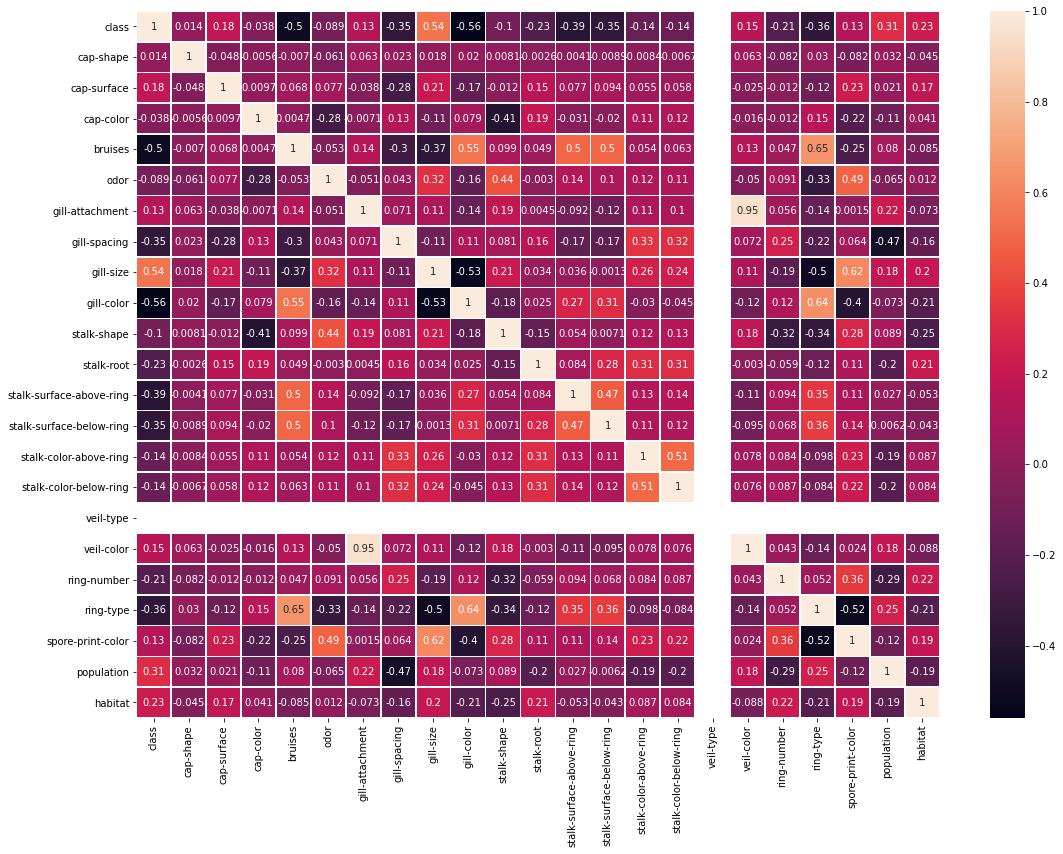

In [9]:
plt.figure(figsize = (18,13))
sns.heatmap(corr,annot = True,lw = .7, )

# Observations from the above correlation:
* There is highly negative correlation between class & gill-color = -56%, bruises = -50%,stalk-surface-above-ring = 39%,stalk-surface-below-ring = 35%, ring-type = -36%, gill -spacing is -35%
* Highly positive corelation between gill size = 54%,population = 31%, habitat @ 23%
* veil-type had a unique category hence it does not impact the correlation & this column dropped
* Majoity of data is spread between -30% to 30% of correlation.

In [10]:
mdf.skew()

class                       0.071946
cap-shape                   0.070111
cap-surface                -0.625895
cap-color                   0.397676
bruises                     0.342750
odor                        0.183789
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.004259
stalk-shape                -0.271345
stalk-root                  4.006883
stalk-surface-above-ring   -0.814454
stalk-surface-below-ring   -0.608304
stalk-color-above-ring     -1.177441
stalk-color-below-ring     -1.150403
veil-type                   0.000000
veil-color                 -6.280943
ring-number                 3.242739
ring-type                  -0.433720
spore-print-color           0.391304
population                 -2.144722
habitat                     0.960945
dtype: float64

There is large skewness in veil-color ia at approx -7%, gill-attachment at approx -6%, ring-number is at 2.7%, stalk-color above-ring & stalk-color-below-ring at approximately -1.8%, gill-spacing = 1.8% , population at -1.4%, stalk root & stalk-surface-above-ring at around 1%. 

In [11]:
mdf.drop('veil-type',axis=1,inplace=True)
mdf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,112,120,115,110,116,112,102,99,110,107,...,115,115,119,119,119,111,112,107,115,117
1,101,120,115,121,116,97,102,99,98,107,...,115,115,119,119,119,111,112,110,110,103
2,101,98,115,119,116,108,102,99,98,110,...,115,115,119,119,119,111,112,110,110,109
3,112,120,121,119,116,112,102,99,110,110,...,115,115,119,119,119,111,112,107,115,117
4,101,120,115,103,102,110,102,119,98,107,...,115,115,119,119,119,111,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,101,107,115,110,102,110,97,99,98,121,...,115,115,111,111,111,111,112,98,99,108
8120,101,120,115,110,102,110,97,99,98,121,...,115,115,111,111,110,111,112,98,118,108
8121,101,102,115,110,102,110,97,99,98,110,...,115,115,111,111,111,111,112,98,99,108
8122,112,107,121,110,102,121,102,99,110,98,...,115,107,119,119,119,111,101,119,118,108


class                          AxesSubplot(0.125,0.772143;0.168478x0.107857)
cap-shape                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
cap-surface                 AxesSubplot(0.529348,0.772143;0.168478x0.107857)
cap-color                   AxesSubplot(0.731522,0.772143;0.168478x0.107857)
bruises                        AxesSubplot(0.125,0.642714;0.168478x0.107857)
odor                        AxesSubplot(0.327174,0.642714;0.168478x0.107857)
gill-attachment             AxesSubplot(0.529348,0.642714;0.168478x0.107857)
gill-spacing                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
gill-size                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
gill-color                  AxesSubplot(0.327174,0.513286;0.168478x0.107857)
stalk-shape                 AxesSubplot(0.529348,0.513286;0.168478x0.107857)
stalk-root                  AxesSubplot(0.731522,0.513286;0.168478x0.107857)
stalk-surface-above-ring       AxesSubplot(0.125,0.383857;0.168478x0.107857)

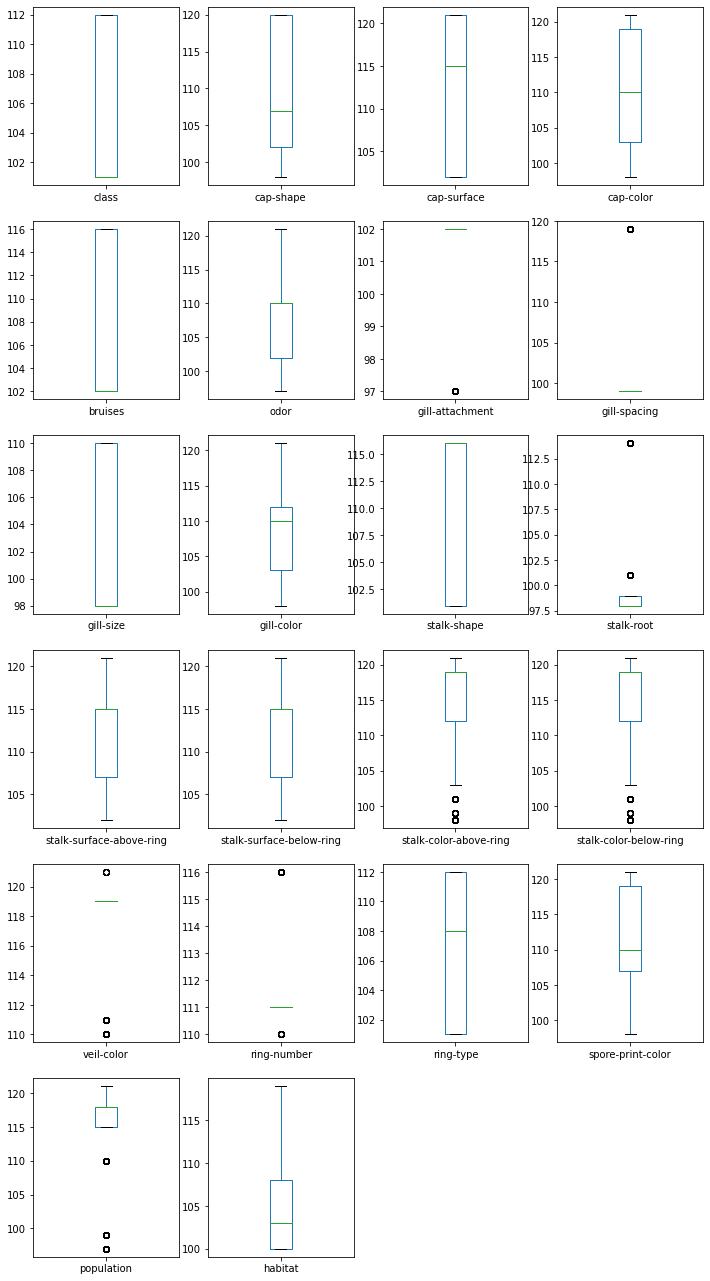

In [12]:
mdf.plot(kind = 'box', subplots = True, layout = (6,4),figsize = (12,23))

The dataset is highly skewed & also has many outliers, lets work on removing outliers & treaing skewness.


In [13]:
from scipy.stats import zscore

In [14]:
z=np.abs(zscore(mdf))
threshold = 3
print(np.where(z>3))

(array([   4,   14,   16, ..., 8121, 8123, 8123], dtype=int64), array([20, 20, 20, ..., 16,  6, 16], dtype=int64))


In [15]:
mdf_new=mdf[(z<3).all(axis=1)]
mdf_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [16]:
Q1 = mdf.quantile(0.25)
Q3 = mdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

class                       11.0
cap-shape                   18.0
cap-surface                 19.0
cap-color                   16.0
bruises                     14.0
odor                         8.0
gill-attachment              0.0
gill-spacing                 0.0
gill-size                   12.0
gill-color                   9.0
stalk-shape                 15.0
stalk-root                   1.0
stalk-surface-above-ring     8.0
stalk-surface-below-ring     8.0
stalk-color-above-ring       7.0
stalk-color-below-ring       7.0
veil-color                   0.0
ring-number                  0.0
ring-type                   11.0
spore-print-color           12.0
population                   3.0
habitat                      8.0
dtype: float64


In [17]:
mdf_iqr=mdf[~((mdf < (Q1 - 1.5 * IQR)) | (mdf > (Q3 - 1.5 * IQR))).any(axis=1)]
mdf_iqr.shape

(0, 22)

With either zscore or IQR the whole data is erased lets see some of the columns who have outliers & highly skewed that can be dropped f not highly coorelated with target column.
* gill-attachment has negative skewness -5.977076 & has outliers has a positive 13% correlaton with target column.
* stalk-root again has high skewness of 4.006883 and also has outliers, is negatively correlated with target column @ -23%
* ring-number has a skewness of 3.242739 & has some outliers & is -ve correlated with target column @ 21%
* veil-color has high negative skewness of -6.280943 & also has outliers, is moderately correlated with target column @ 15% * population has negative skewness of -2.144722 & also has many outliers but has positive correlation @ 31%.
* gill-spacing has skewness of 1.840088, has outlier & has high -ve correlation of -23%
* stalk-color-above-ring has skewness(-1.177441), also has outliers & has moderate -ve orrelation of 14%
* stalk-color-below-ring has skewness of(-1.150403), also has outliers & has moderate -ve orrelation of 14%

> From these observations we can conclude that column with high skewness & outliers with moderate to low correlation like - gill-attachment, stalk-root,ring-number, veil-color, gill-spacing,stalk-color above & below ring are safe to be dropped before further analysis.

In [18]:
mdf.drop(['gill-attachment','stalk-root','ring-number','veil-color','gill-spacing','stalk-color-above-ring','stalk-color-below-ring'],axis=1,inplace=True)
mdf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,112,120,115,110,116,112,110,107,101,115,115,112,107,115,117
1,101,120,115,121,116,97,98,107,101,115,115,112,110,110,103
2,101,98,115,119,116,108,98,110,101,115,115,112,110,110,109
3,112,120,121,119,116,112,110,110,101,115,115,112,107,115,117
4,101,120,115,103,102,110,98,107,116,115,115,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,101,107,115,110,102,110,98,121,101,115,115,112,98,99,108
8120,101,120,115,110,102,110,98,121,101,115,115,112,98,118,108
8121,101,102,115,110,102,110,98,110,101,115,115,112,98,99,108
8122,112,107,121,110,102,121,110,98,116,115,107,101,119,118,108


In [19]:
mdf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,112,120,115,110,116,112,110,107,101,115,115,112,107,115,117
1,101,120,115,121,116,97,98,107,101,115,115,112,110,110,103
2,101,98,115,119,116,108,98,110,101,115,115,112,110,110,109
3,112,120,121,119,116,112,110,110,101,115,115,112,107,115,117
4,101,120,115,103,102,110,98,107,116,115,115,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,101,107,115,110,102,110,98,121,101,115,115,112,98,99,108
8120,101,120,115,110,102,110,98,121,101,115,115,112,98,118,108
8121,101,102,115,110,102,110,98,110,101,115,115,112,98,99,108
8122,112,107,121,110,102,121,110,98,116,115,107,101,119,118,108


The columns have been shrinked to 15 columns now.

# Splitting & Scaling of the data

In [20]:
x=mdf.iloc[:,1:]

In [21]:
y=mdf.iloc[:,0]

In [22]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,120,115,110,116,112,110,107,101,115,115,112,107,115,117
1,120,115,121,116,97,98,107,101,115,115,112,110,110,103
2,98,115,119,116,108,98,110,101,115,115,112,110,110,109
3,120,121,119,116,112,110,110,101,115,115,112,107,115,117
4,120,115,103,102,110,98,107,116,115,115,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,107,115,110,102,110,98,121,101,115,115,112,98,99,108
8120,120,115,110,102,110,98,121,101,115,115,112,98,118,108
8121,102,115,110,102,110,98,110,101,115,115,112,98,99,108
8122,107,121,110,102,121,110,98,116,115,107,101,119,118,108


In [23]:
x.skew()

cap-shape                   0.070111
cap-surface                -0.625895
cap-color                   0.397676
bruises                     0.342750
odor                        0.183789
gill-size                   0.825797
gill-color                  0.004259
stalk-shape                -0.271345
stalk-surface-above-ring   -0.814454
stalk-surface-below-ring   -0.608304
ring-type                  -0.433720
spore-print-color           0.391304
population                 -2.144722
habitat                     0.960945
dtype: float64

# Lets treat the skewness

In [24]:
from sklearn.preprocessing import power_transform
x=power_transform (x,method = 'yeo-johnson')

# Standarization of the data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale=StandardScaler()

In [27]:
x=scale.fit_transform(x)

In [28]:
x.shape

(8124, 14)

# Modeling of the data

In [29]:
lgr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()

In [30]:
model = (lgr,svc,gnb,dtc)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .27, random_state = 387)

In [32]:
model = [lgr,svc,gnb,dtc]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of ', m, 'is: ' )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 7)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', 'm', 'is: ',cross_val.std())
    print('\n')
    print('\n')

Accuracy score of  LogisticRegression() is: 
0.8482224247948952
[[1018  140]
 [ 193  843]]
              precision    recall  f1-score   support

         101       0.84      0.88      0.86      1158
         112       0.86      0.81      0.84      1036

    accuracy                           0.85      2194
   macro avg       0.85      0.85      0.85      2194
weighted avg       0.85      0.85      0.85      2194



Cross Validation of  LogisticRegression() is: 
Mean CV of  LogisticRegression() is:  0.8152582069983835 and Std CV of  m is:  0.08737728683429095




Accuracy score of  SVC() is: 
0.9516864175022789
[[1109   49]
 [  57  979]]
              precision    recall  f1-score   support

         101       0.95      0.96      0.95      1158
         112       0.95      0.94      0.95      1036

    accuracy                           0.95      2194
   macro avg       0.95      0.95      0.95      2194
weighted avg       0.95      0.95      0.95      2194



Cross Validation of  SVC(

From above train & test split we can see the best fit model is with DecisionTreeClassifier with accuracy_score of 96.718% & cross validation score of 90.459%. We will proceed with this model for hypertuning & then serialization.

# Hypertuning the Best Model

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'criterion': ['gini','entropy'],'splitter': ['best','random'],'ccp_alpha':[0.0001,0.001,0.001,.01,.1,1,10],}
clf= GridSearchCV(dtc,parameters,cv=7)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'splitter': 'random'}


In [35]:
dtc=DecisionTreeClassifier(ccp_alpha=0.0001,criterion = 'gini',splitter = 'random')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('Accuracy_Score = ', accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,predm))

Accuracy_Score =  0.96718322698268
[[1141   17]
 [  55  981]]
              precision    recall  f1-score   support

         101       0.95      0.99      0.97      1158
         112       0.98      0.95      0.96      1036

    accuracy                           0.97      2194
   macro avg       0.97      0.97      0.97      2194
weighted avg       0.97      0.97      0.97      2194



# Serialization

In [36]:
import joblib


In [37]:
joblib.dump(dtc,'mushroom_dataset.pkl')

['mushroom_dataset.pkl']

# Conclusion

In [38]:
a=np.array(y_test)
p = np.array(dtc.predict(x_test))
print(a)
print('\n')
print(p)
mushroom_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
mushroom_df

[101 112 112 ... 101 112 112]


[101 101 112 ... 101 112 112]


,Original,Predicted
0,101,101
1,112,101
2,112,112
3,112,112
4,112,112
...,...,...
2189,112,112
2190,112,112
2191,101,101
2192,112,112
